<a href="https://colab.research.google.com/github/vinayp1120/A-Dataset-for-Automatic-Violence-Detection-in-Videos/blob/master/Sign_language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project demonstrates a simple model for sign language detection using tensorflow module which helps in making own ML models




Step 1: In order to proceed with need some basic libraries so first is to import the ⛹.ImageDataGenerator class in tensorflwo is used to generate batches of augmented data.I mean that for example i had 512 images and batch size of 32 images total (512/32) 16 batches each batch has 32 images .The model processess 32 images at a time in paralled.

In [2]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


This is the data set that has 0-25 labes in the first column
Later as the trainig image is 28x28 pixles.
Each pixel value will be in the range [0, 255].

In [3]:
df=pd.read_csv('/content/sign_mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


xclusion of 'J' and 'Z':


we're not building a classifier to recognize these two letters. This means:


1. Your dataset will only contain data for 24 letters (A-I, K, L-V, W-X, Y).
2. Your one-hot encoding will have 24 classes.


In [4]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data('/content/sign_mnist_train.csv')
X_test, Y_test = load_data('/content/sign_mnist_test.csv')


In [5]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


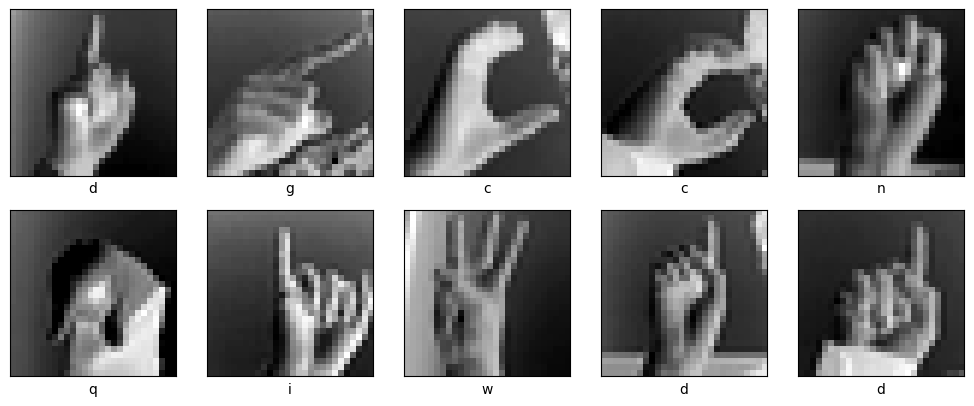

In [6]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()


In [7]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(24, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1600)                │           6,400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [9]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)


In [11]:
history = model.fit(X_train,
					Y_train,
					validation_data=(X_test, Y_test),
					epochs=10,
					verbose=1)


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8049 - loss: 0.7230 - val_accuracy: 0.7974 - val_loss: 0.7797
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9974 - loss: 0.0208 - val_accuracy: 0.5884 - val_loss: 2.0914
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9880 - loss: 0.0466 - val_accuracy: 0.8279 - val_loss: 0.7455
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9965 - loss: 0.0152 - val_accuracy: 0.8673 - val_loss: 0.5720
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9972 - loss: 0.0116 - val_accuracy: 0.7175 - val_loss: 1.6476
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9163 - val_loss: 0.3421
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.8869 - val_loss: 0.5881
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9921 - loss: 0.0223 - 

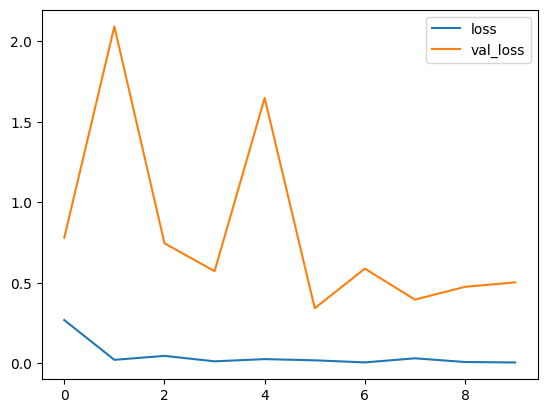

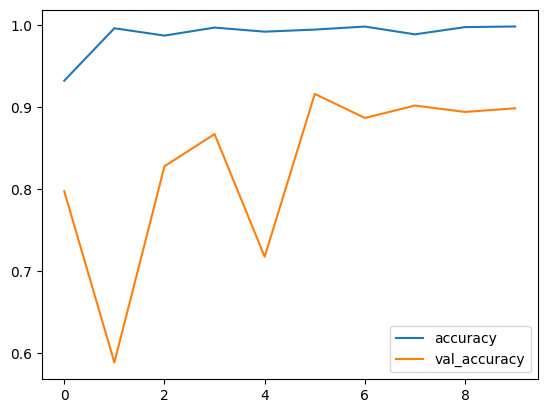

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()


In [13]:
model.evaluate(x=X_test, y=Y_test)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8962 - loss: 0.5008


[0.5026272535324097, 0.8987730145454407]

In [14]:
model.save("sign_language_model.h5")
print("Model saved successfully")


Model saved successfully
